In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from numpy import genfromtxt
data1 = genfromtxt('data1.csv', delimiter=',')
X = data1[:,:-1]
Y = data1[:, -1]
y=pd.DataFrame(Y)

### Question 2

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.rename(columns={0: "target"}, inplace=True)


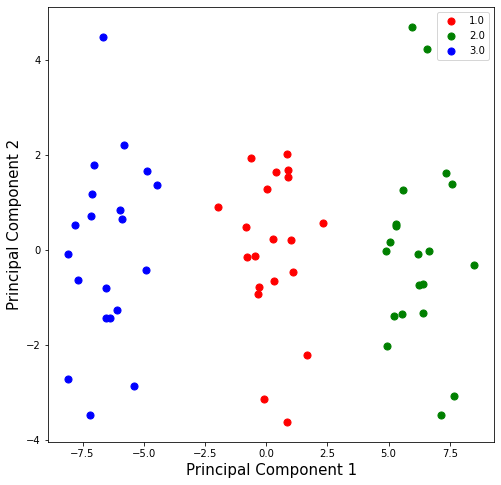

In [4]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

targets = finalDf.target.unique()
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color, s = 50)
ax.legend(targets)

### Question 3

In [52]:
from sklearn.cluster import KMeans

X_ = data1[:,:-1]
y_ = data1[:, -1]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_)
y_kmeans = kmeans.predict(X_)

#plt.scatter(X_[:, 0], X_[:, 1], c=y_kmeans, s=50, cmap='viridis')

#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

count=0
for score1,score2 in zip(y_kmeans,y_):
    if(score1==int(score2)):
        count=count+1
print(count)

40


In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_,y_kmeans)

0.6666666666666666

Out of the 60 observations, we can see that 40 of the datapoints are correctly labeled as the true target lables. We can hence conclude that the Kmeans accuracy is 66.67% 

### Question 4

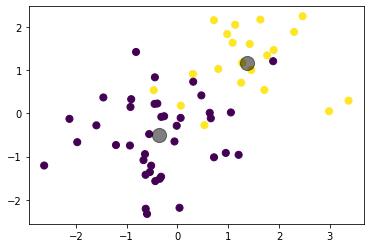

In [34]:
# For Kmeans = 2

kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(X_)
y_kmeans2 = kmeans2.predict(X_)
plt.scatter(X_[:, 0], X_[:, 1], c=y_kmeans2, s=50, cmap='viridis')

centers2 = kmeans2.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=200, alpha=0.5)

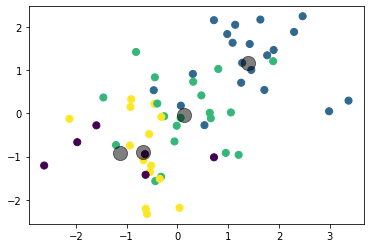

In [35]:
# For Kmeans = 4

kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(X_)
y_kmeans4 = kmeans4.predict(X_)
plt.scatter(X_[:, 0], X_[:, 1], c=y_kmeans4, s=50, cmap='viridis')

centers4 = kmeans4.cluster_centers_
plt.scatter(centers4[:, 0], centers4[:, 1], c='black', s=200, alpha=0.5)

We use the clustering algorithm to separate the datapoints based on the similarities of the properties in thier features. 

In K=2 i.e. small number of clusters, we can determine small and important differences between the groups. Intricate details and differences are often missed out.
In K=4 i.e. larger number of clusters, we can determine detailed differences between the datapoints with their underlying features. 

If we increase the number of clusters, we will have more centroids for the corresponding clusters which will increase the 'between' variability and in turn reduce the 'within' variablility and vice versa. Between variability measures the center of the whole data and the calculated centroid. In our case, we can say that Kmeans=3 is the optimum number of clusters that are required. Wintin variability measures the measures the distance between each point and the center of the cluster to which that point belongs. We can determine the optimum number of required clusters by various methods like Elbow method, Average silhouette method and the Gap statistic method

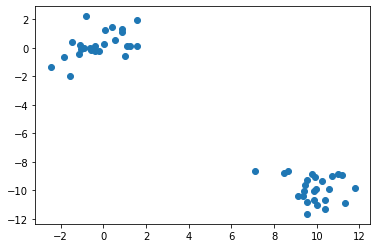

In [56]:
data2 = np.genfromtxt('data2.csv', delimiter=',')
plt.scatter(data2[:,0], data2[:,1])

Two clusters can be seen in the data

In [57]:
# (b) Inter Observational Distance

import math
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
# manually finding inter observational distance among each pairs
observational_distance=[]
for i in range (len(data2)):
    for j in range (len(data2)):
        observational_distance.append(math.dist(data2[i],data2[j]))
#The matrix observational_distance contains the distances between each pair of data points

# The inter observational distance can also be found using inbuilt functions that can be used in linkage

observational_distance1=pdist(data2, metric='euclidean')
print("the observational distance matrix is")
print(observational_distance1)


the observational distance matrix is
[2.08214614 1.10195725 2.5063929  ... 1.70270849 1.57807901 1.59521567]


the cluster lables are
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


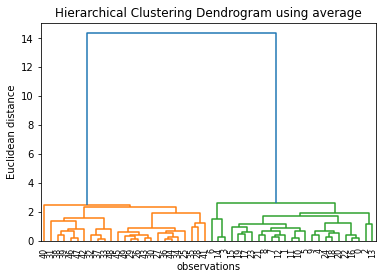

In [58]:
#(c) Hierarchical clustering performed using average
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

average_hierarchial_clustering=linkage(observational_distance1, method='average',metric='euclidean',optimal_ordering=True)
# (c)plotting the dendogram
plt.title('Hierarchical Clustering Dendrogram using average')
plt.xlabel('observations')
plt.ylabel('Euclidean distance')
dendrogram_average= dendrogram(average_hierarchial_clustering)
# (d) Idenfiying cluster labels
average_cluster_labels = fcluster(average_hierarchial_clustering, 8, criterion='distance')
# the distance set at 8 in above step to get 2 clusters as deduced from plotting the data
print("the cluster lables are")
print(average_cluster_labels)


the cluster lables are
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]


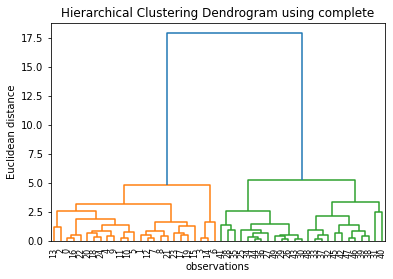

In [59]:
#(c) Hierarchical clustering performed using complete
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

complete_hierarchial_clustering=linkage(observational_distance1, method='complete',metric='euclidean',optimal_ordering=True)
# (c)plotting the dendogram
plt.title('Hierarchical Clustering Dendrogram using complete')
plt.xlabel('observations')
plt.ylabel('Euclidean distance')
dendrogram_complete= dendrogram(complete_hierarchial_clustering)
# (d) Idenfiying cluster labels
complete_cluster_labels=fcluster(complete_hierarchial_clustering,8,criterion='distance')
# the distance set at 8 in above step to get 2 clusters as deduced from plotting the data
print("the cluster lables are")
print(complete_cluster_labels)

the cluster lables are
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


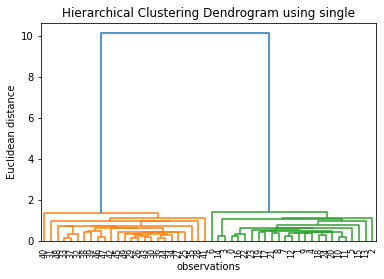

In [60]:
#(c) Hierarchical clustering performed using single
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

single_hierarchial_clustering=linkage(observational_distance1, method='single',metric='euclidean',optimal_ordering=True)
# (c)plotting the dendogram
plt.title('Hierarchical Clustering Dendrogram using single')
plt.xlabel('observations')
plt.ylabel('Euclidean distance')
dendrogram_single= dendrogram(single_hierarchial_clustering)
# (d) Idenfiying cluster labels
single_cluster_labels=fcluster(single_hierarchial_clustering,8,criterion='distance')
# the distance set at 8 in above step to get 2 clusters as deduced from plotting the data
print("the cluster lables are")
print(single_cluster_labels)
